In [3]:
# Import libraries 
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\meher\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [4]:
#!pip install librosa

In [5]:
#from google.colab import drive
#drive.mount("/content/drive")

SAVEE dataset

In [6]:
SAVEE = "SAVEE/ALL/"
# Run one example 
dir_list = os.listdir(SAVEE)
dir_list[0:5]

['DC_a01.wav', 'DC_a02.wav', 'DC_a03.wav', 'DC_a04.wav', 'DC_a05.wav']

In [7]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('male_angry')
    elif i[-8:-6]=='_d':
        emotion.append('male_disgust')
    elif i[-8:-6]=='_f':
        emotion.append('male_fear')
    elif i[-8:-6]=='_h':
        emotion.append('male_happy')
    elif i[-8:-6]=='_n':
        emotion.append('male_neutral')
    elif i[-8:-6]=='sa':
        emotion.append('male_sad')
    elif i[-8:-6]=='su':
        emotion.append('male_surprise')
    else:
        emotion.append('male_error') 
    path.append(SAVEE + i)
    
# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_sad          60
male_disgust      60
male_surprise     60
male_fear         60
male_angry        60
male_happy        60
Name: labels, dtype: int64

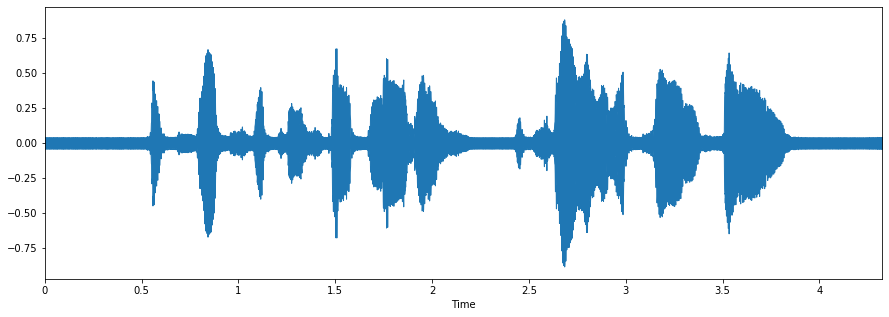

In [8]:
# use the well known Librosa library for this task 
fname = SAVEE + 'DC_f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

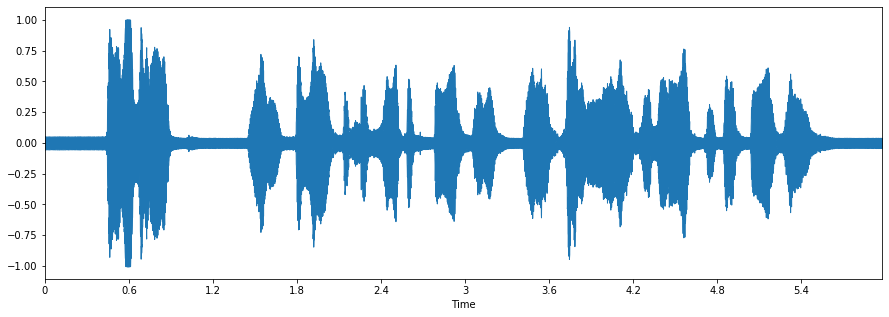

In [9]:
# Lets play a happy track
fname = SAVEE + 'DC_h11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

RAVDESS dataset

In [10]:
RAV= "RAVDESS/audio_speech_actors_01-24/"
TESS = "TESS/TESS Toronto emotional speech set data/"
CREMA= "CREMA-D/AudioWAV/"

In [11]:
dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []
for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

        
RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

female_neutral     144
male_neutral       144
male_fear           96
female_angry        96
female_happy        96
male_disgust        96
female_surprise     96
male_sad            96
male_surprise       96
male_angry          96
male_happy          96
female_fear         96
female_disgust      96
female_sad          96
Name: labels, dtype: int64

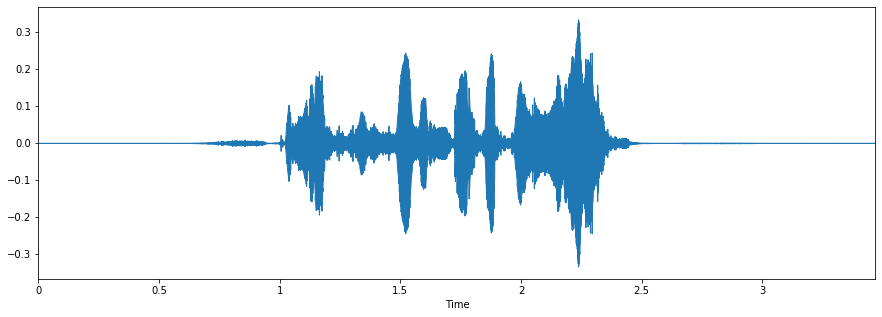

In [12]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-01-06-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

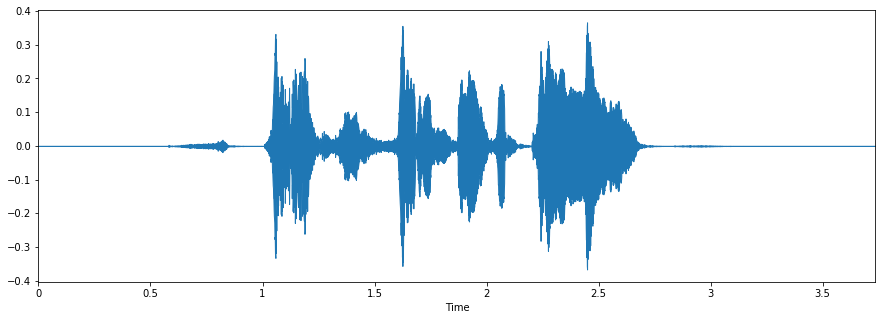

In [13]:
# Pick a happy track
fname = RAV + 'Actor_14/03-01-03-02-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

TESS dataset

In [14]:
TESS = "TESS/TESS Toronto emotional speech set data/"
dir_list = os.listdir(TESS)
dir_list.sort()
dir_list

['OAF_Fear',
 'OAF_Pleasant_surprise',
 'OAF_Sad',
 'OAF_angry',
 'OAF_disgust',
 'OAF_happy',
 'OAF_neutral',
 'YAF_angry',
 'YAF_disgust',
 'YAF_fear',
 'YAF_happy',
 'YAF_neutral',
 'YAF_pleasant_surprised',
 'YAF_sad']

In [15]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(TESS + i)
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('female_angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('female_disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('female_fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('female_happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('female_neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('female_surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('female_sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_sad         400
female_angry       400
female_happy       400
female_neutral     400
female_surprise    400
female_fear        400
female_disgust     400
Name: labels, dtype: int64

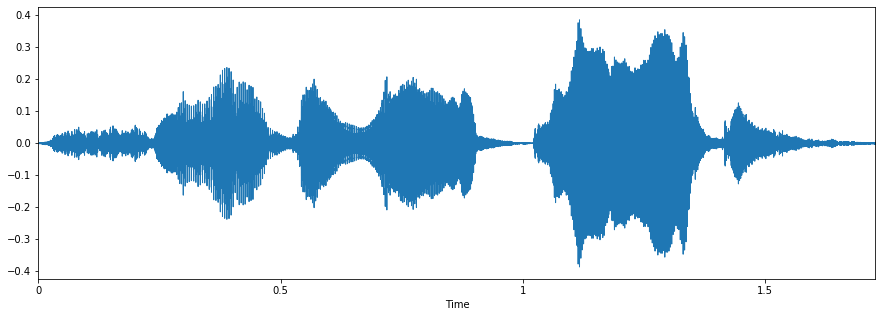

In [16]:
# lets play a fearful track 
fname = TESS + 'YAF_fear/YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

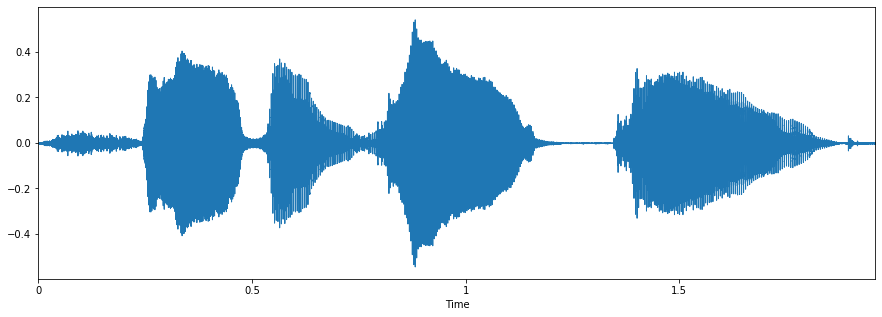

In [17]:
# lets play a happy track 
fname =  TESS + 'YAF_happy/YAF_dog_happy.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

CREMA-D dataset

In [18]:
dir_list = os.listdir(CREMA)
dir_list.sort()
print(dir_list[0:10])

['1001_DFA_DIS_XX.wav', '1001_DFA_FEA_XX.wav', '1001_DFA_HAP_XX.wav', '1001_DFA_NEU_XX.wav', '1001_DFA_SAD_XX.wav', '1001_IEO_ANG_HI.wav', '1001_IEO_ANG_LO.wav', '1001_IEO_ANG_MD.wav', '1001_IEO_DIS_HI.wav', '1001_IEO_DIS_LO.wav']


In [19]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
    path.append(CREMA + i)
    
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()


male_happy        671
male_fear         671
male_disgust      671
male_sad          671
male_angry        670
female_sad        600
female_fear       600
female_disgust    600
female_angry      600
female_happy      600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

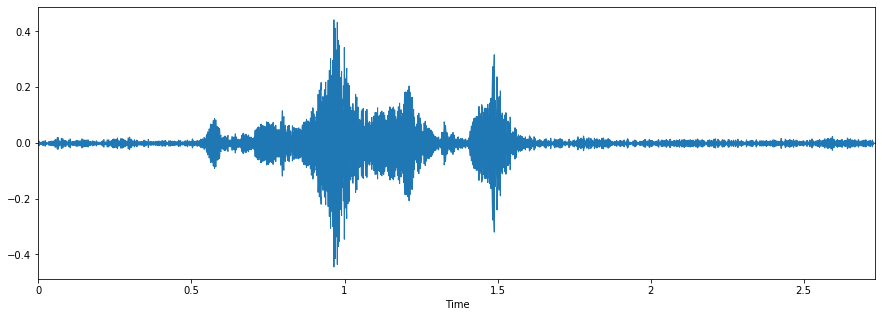

In [20]:
# use the well known Librosa library for this task 
fname = CREMA + '1012_IEO_HAP_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

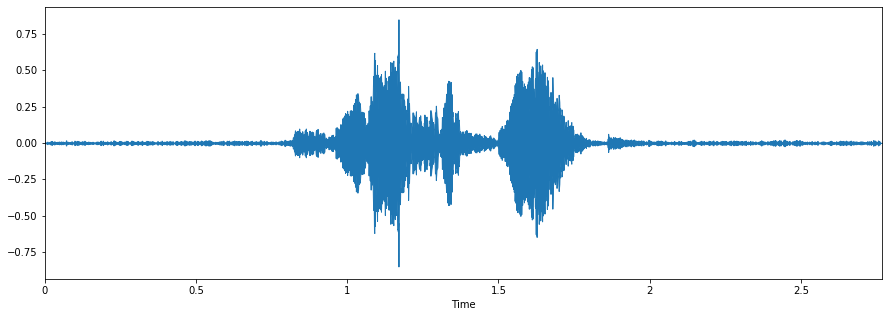

In [21]:
# A fearful track
fname = CREMA + '1012_IEO_FEA_HI.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [22]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)
print(df.labels.value_counts())
df.shape

female_disgust     1096
female_sad         1096
female_fear        1096
female_angry       1096
female_happy       1096
female_neutral     1056
male_neutral        839
male_sad            827
male_happy          827
male_fear           827
male_disgust        827
male_angry          826
female_surprise     496
male_surprise       156
Name: labels, dtype: int64


(12161, 3)

**FEATURES EXTRACTIONS**

MFCC

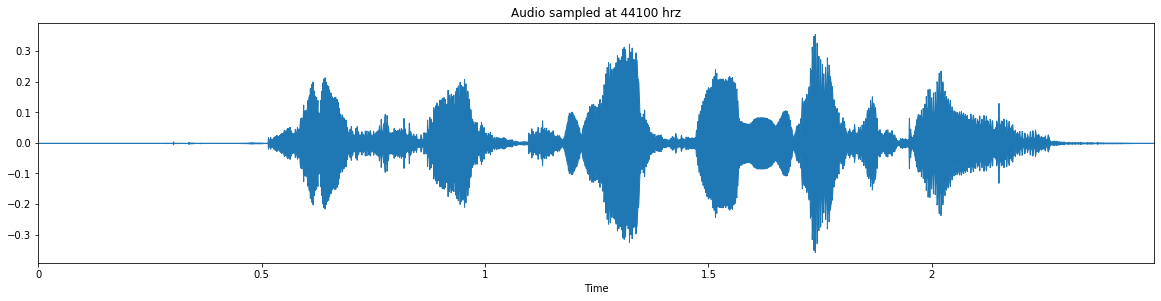

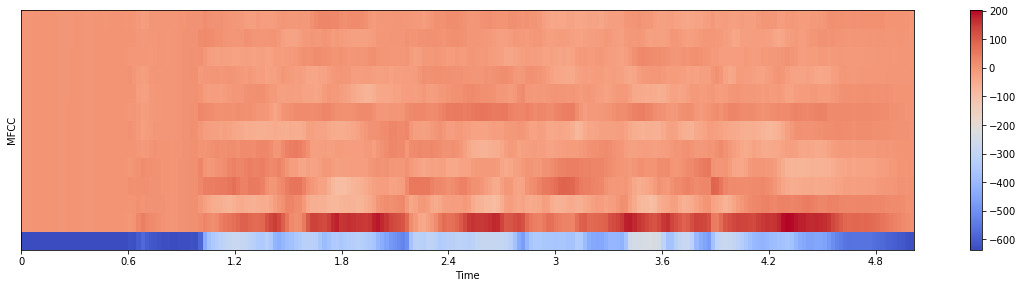

In [23]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

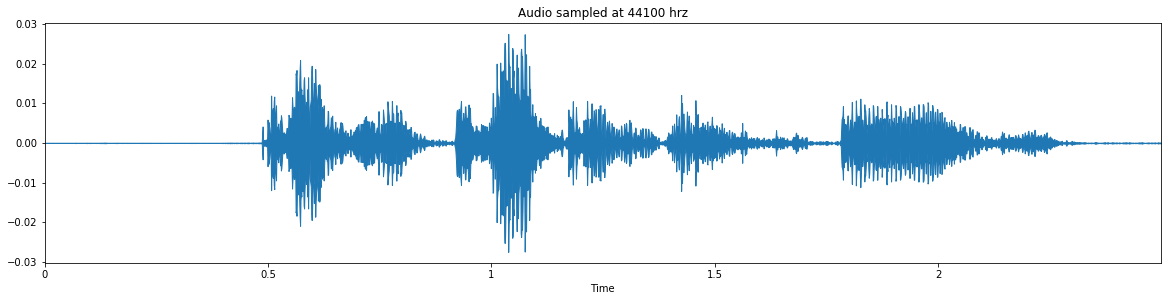

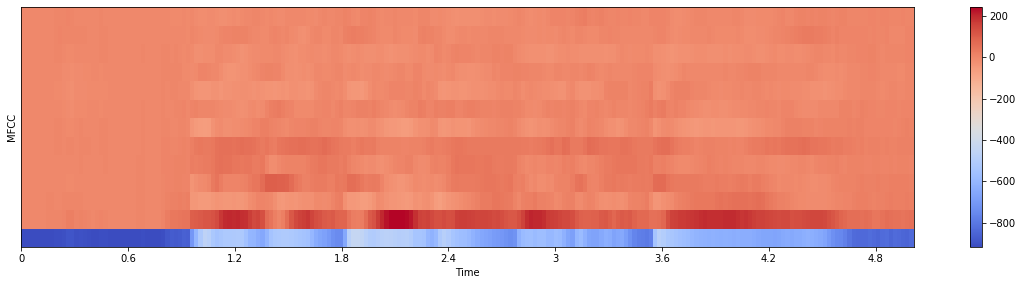

In [24]:
# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

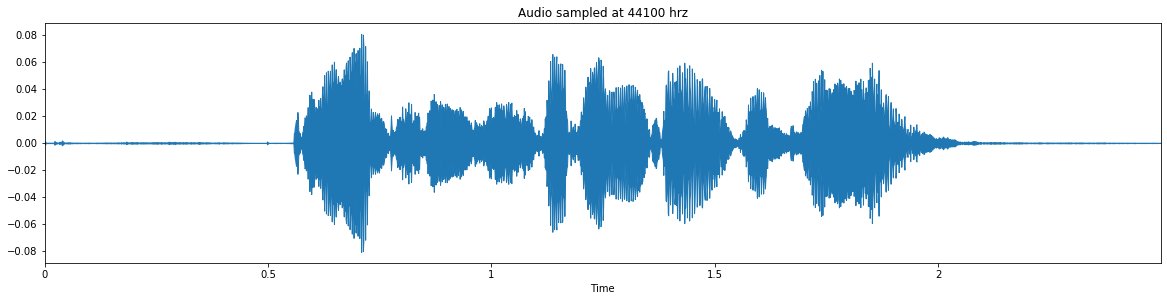

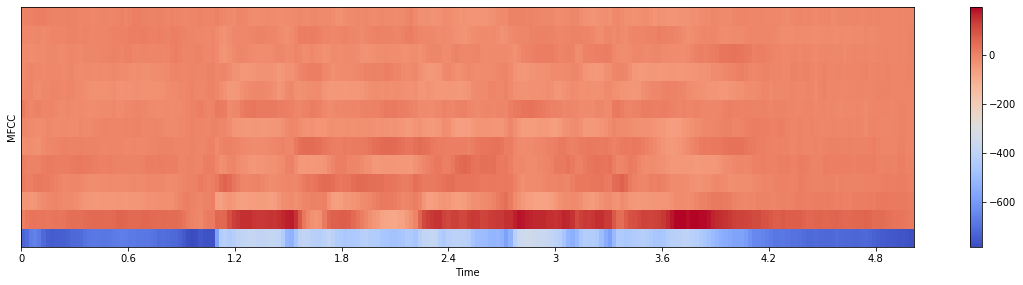

In [25]:
# Source - RAVDESS; Gender - Female; Emotion - Happy 
path = "RAVDESS/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

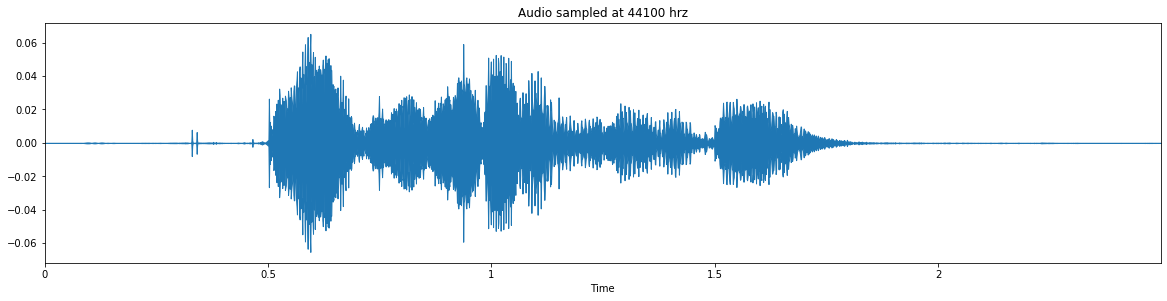

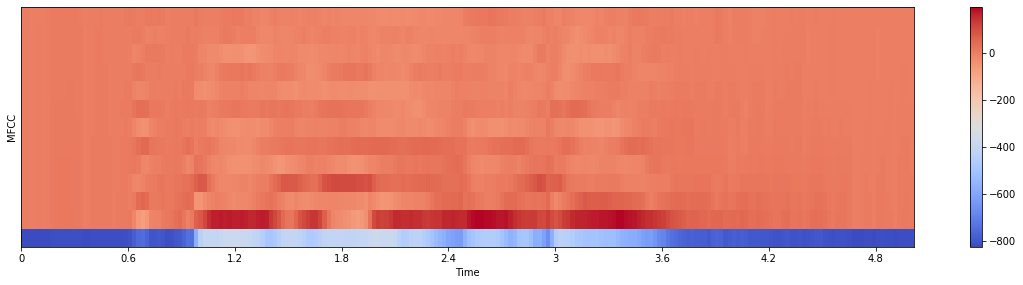

In [26]:
# Source - RAVDESS; Gender - Male; Emotion - Happy 
path = "RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

Statistical features

216
216


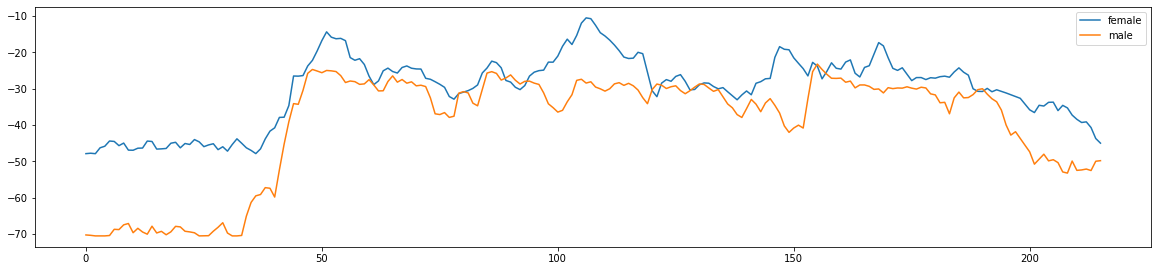

In [27]:
# Source - RAVDESS; Gender - Female; Emotion - Angry 
path = "RAVDESS/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry 
path = "RAVDESS/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

216
216


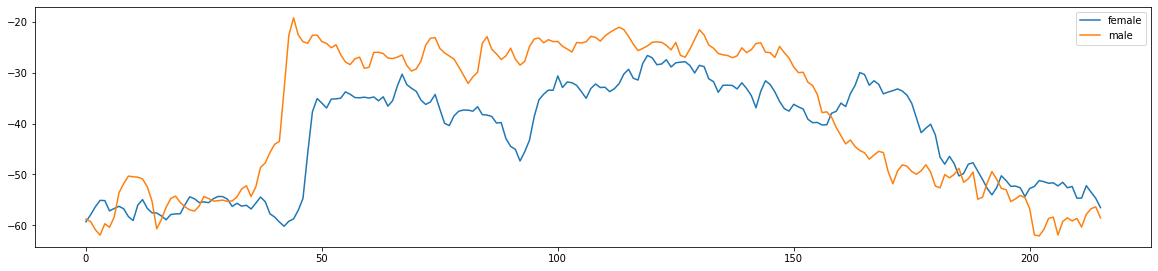

In [28]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "RAVDESS/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "RAVDESS/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

**Baseline model**

In [29]:
# Importing required libraries 
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [30]:
import json
import seaborn as sns
import glob 
import os
import pickle
import IPython.display as ipd 

In [31]:
ref = df
ref.head()


labels source                  path
0  male_angry  SAVEE  SAVEE/ALL/DC_a01.wav
1  male_angry  SAVEE  SAVEE/ALL/DC_a02.wav
2  male_angry  SAVEE  SAVEE/ALL/DC_a03.wav
3  male_angry  SAVEE  SAVEE/ALL/DC_a04.wav
4  male_angry  SAVEE  SAVEE/ALL/DC_a05.wav

In [32]:
ref.shape

(12161, 3)

In [33]:
#Note this takes a couple of minutes(~10 mins)as we're iterating over 4 datasets 
df = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(ref.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=2.5
                                  ,sr=44100
                                  ,offset=0.5
                                 )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df))
df.head()


12161


feature
0  [-11.113933, -7.2157545, -6.21919, -5.926543, ...
1  [-24.44983, -22.465742, -22.928043, -23.243807...
2  [-25.000114, -24.520256, -24.178183, -23.84745...
3  [-1.529839, -4.3334365, -12.285237, -13.083024...
4  [-22.458632, -22.467834, -25.884357, -27.82704...

Data processing

In [34]:
x = df

In [35]:
df.to_csv('all_data.csv')

In [36]:
ref.shape

(12161, 3)

In [37]:
z = df
ref.head()

labels source                  path
0  male_angry  SAVEE  SAVEE/ALL/DC_a01.wav
1  male_angry  SAVEE  SAVEE/ALL/DC_a02.wav
2  male_angry  SAVEE  SAVEE/ALL/DC_a03.wav
3  male_angry  SAVEE  SAVEE/ALL/DC_a04.wav
4  male_angry  SAVEE  SAVEE/ALL/DC_a05.wav

In [38]:
features=pd.DataFrame(x['feature'].values.tolist())

In [39]:
dx=ref.join(features)

In [40]:
# Now extract the mean bands to its own feature columns
dx.head()


labels   source                                               path  \
0    male_angry    SAVEE                               SAVEE/ALL/DC_a01.wav   
0  male_neutral  RAVDESS  RAVDESS/audio_speech_actors_01-24/Actor_01/03-...   
0   female_fear     TESS  TESS/TESS Toronto emotional speech set data/OA...   
0  male_disgust    CREMA               CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav   
1    male_angry    SAVEE                               SAVEE/ALL/DC_a02.wav   

           0          1          2          3          4          5  \
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
1 -24.449829 -22.465742 -22.928043 -23.243807 -22.926605 -23.432241   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
1 -14.830004  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   

         211        212        213        214        215  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
1 -22.895985 -23.511503 -24.342152 -24.530264 -25.457796  

[5 rows x 219 columns]

In [41]:
df.index.is_unique

True

In [42]:
ref.index.is_unique

False

In [43]:
# replace NA with 0
dx=dx.fillna(0)
print(dx.shape)
dx[:5]

(12161, 219)


labels   source                                               path  \
0    male_angry    SAVEE                               SAVEE/ALL/DC_a01.wav   
0  male_neutral  RAVDESS  RAVDESS/audio_speech_actors_01-24/Actor_01/03-...   
0   female_fear     TESS  TESS/TESS Toronto emotional speech set data/OA...   
0  male_disgust    CREMA               CREMA-D/AudioWAV/1001_DFA_DIS_XX.wav   
1    male_angry    SAVEE                               SAVEE/ALL/DC_a02.wav   

           0          1          2          3          4          5  \
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
0 -11.113933  -7.215755  -6.219190  -5.926543  -5.850419  -4.808960   
1 -24.449829 -22.465742 -22.928043 -23.243807 -22.926605 -23.432241   

           6  ...        206        207        208        209        210  \
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
0  -2.513003  ...  -4.088852  -5.023864  -5.254714  -5.234094  -5.310308   
1 -14.830004  ... -22.627258 -22.633406 -22.511597 -24.300154 -24.496809   

         211        212        213        214        215  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
0  -5.621665  -6.072197  -6.611348  -2.509089   1.964608  
1 -22.895985 -23.511503 -24.342152 -24.530264 -25.457796  

[5 rows x 219 columns]

In [52]:
dx.to_csv("all_data.csv")

In [44]:
# Split between train and test 
X_train, X_test, y_train, y_test = train_test_split(dx.drop(['path','labels','source'],axis=1)
                                                    , dx.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

# Lets see how the data present itself before normalisation 
X_train[150:160]

0          1          2          3          4          5    \
1515 -63.250534 -63.250534 -63.250534 -63.250534 -63.250534 -63.250534   
1126 -58.214657 -58.350906 -58.609592 -59.851231 -60.626900 -57.189590   
6900 -18.959011 -18.881336 -21.136391 -19.381960 -16.226414 -17.818544   
2900 -14.812641 -17.291103 -25.427702 -25.601166 -25.140547 -26.661156   
6865 -12.749714 -12.045284 -12.905192 -15.215195 -14.241847 -12.585979   
3194 -19.227571 -21.748363 -27.638035 -28.271568 -28.389458 -28.406868   
4792  -5.813799  -6.097371  -6.267408  -7.132443  -7.486943  -7.600612   
1957 -21.690876 -24.483114 -30.433590 -32.582260 -31.175541 -31.480471   
1734 -54.798225 -54.176731 -54.556221 -54.798225 -54.798225 -54.798225   
7025  -2.855998  -6.538288 -11.602223 -12.857886 -14.745498 -14.086480   

            6          7          8          9    ...        206        207  \
1515 -63.250534 -63.250534 -63.250534 -63.250534  ... -62.494411 -63.250534   
1126 -55.965332 -56.527996 -56.893551 -58.996902  ... -50.284092 -51.904278   
6900 -19.326735 -19.242958 -20.296051 -21.613270  ...   0.000000   0.000000   
2900 -28.077822 -28.508213 -29.390007 -29.672482  ...   0.000000   0.000000   
6865 -13.351303 -14.381960 -13.136000 -12.607100  ...   0.000000   0.000000   
3194 -28.674519 -27.320606 -25.862312 -24.860910  ...   0.000000   0.000000   
4792  -8.932975 -12.018171 -12.697250 -11.959089  ...   0.000000   0.000000   
1957 -33.124844 -33.458199 -32.216202 -31.522921  ...   0.000000   0.000000   
1734 -54.798225 -54.798225 -54.798225 -54.798225  ... -52.998924 -53.563248   
7025 -15.326277 -17.504019 -16.800001 -14.980535  ...   0.000000   0.000000   

            208        209        210        211        212        213  \
1515 -63.250534 -62.752365 -60.930870 -63.078152 -63.250534 -63.250534   
1126 -52.815895 -55.480442 -53.425369 -52.847843 -53.829388 -53.075726   
6900   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
2900   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
6865   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
3194   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
4792   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1957   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
1734 -53.979702 -52.833153 -51.633827 -51.439415 -51.158607 -52.462566   
7025   0.000000   0.000000   0.000000   0.000000   0.000000   0.000000   

            214        215  
1515 -63.250534 -63.249126  
1126 -51.971252 -49.901630  
6900   0.000000   0.000000  
2900   0.000000   0.000000  
6865   0.000000   0.000000  
3194   0.000000   0.000000  
4792   0.000000   0.000000  
1957   0.000000   0.000000  
1734 -54.111504 -54.276421  
7025   0.000000   0.000000  

[10 rows x 216 columns]

In [45]:
# Lts do data normalization 
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

# Check the dataset now 
X_train[150:160]

0         1         2         3         4         5         6    \
1515 -1.742872 -1.778645 -1.761579 -1.757653 -1.755075 -1.754889 -1.755173   
1126 -1.482621 -1.514422 -1.488047 -1.558450 -1.602211 -1.403058 -1.334090   
6900  0.546084  0.614056  0.720582  0.813084  0.984754  0.882386  0.783608   
2900  0.760365  0.699813  0.467657  0.448633  0.465378  0.369083  0.277798   
6865  0.866976  0.982705  1.205720  1.057260  1.100384  1.186131  1.128986   
3194  0.532205  0.459446  0.337382  0.292145  0.276083  0.267746  0.243309   
4792  1.225419  1.303458  1.596943  1.530917  1.493954  1.475526  1.384363   
1957  0.404903  0.311969  0.172615  0.039535  0.113753  0.089327 -0.013918   
1734 -1.306063 -1.289321 -1.249146 -1.262340 -1.262607 -1.264242 -1.266632   
7025  1.378276  1.279681  1.282515  1.195401  1.071039  1.099029  1.014833   

           7         8         9    ...       206       207       208  \
1515 -1.756772 -1.760818 -1.759259  ... -2.059462 -2.081522 -2.071244   
1126 -1.369208 -1.394349 -1.514532  ... -1.494168 -1.559420 -1.592960   
6900  0.780330  0.715433  0.636285  ...  0.833806  0.828973  0.827919   
2900  0.246174  0.191183  0.172609  ...  0.833806  0.828973  0.827919   
6865  1.060574  1.128198  1.154443  ...  0.833806  0.828973  0.827919   
3194  0.314642  0.394548  0.449436  ...  0.833806  0.828973  0.827919   
4792  1.196850  1.153491  1.191725  ...  0.833806  0.828973  0.827919   
1957 -0.039200  0.028257  0.066146  ...  0.833806  0.828973  0.827919   
1734 -1.269484 -1.273557 -1.272967  ... -1.619855 -1.635758 -1.646305   
7025  0.880582  0.916975  1.017890  ...  0.833806  0.828973  0.827919   

           209       210       211       212       213       214       215  
1515 -2.035965 -1.945448 -2.032656 -2.022750 -2.006252 -2.019278 -2.013588  
1126 -1.704052 -1.604420 -1.569578 -1.599053 -1.551910 -1.516168 -1.423270  
6900  0.828249  0.823074  0.822597  0.821812  0.818112  0.801996  0.783724  
2900  0.828249  0.823074  0.822597  0.821812  0.818112  0.801996  0.783724  
6865  0.828249  0.823074  0.822597  0.821812  0.818112  0.801996  0.783724  
3194  0.828249  0.823074  0.822597  0.821812  0.818112  0.801996  0.783724  
4792  0.828249  0.823074  0.822597  0.821812  0.818112  0.801996  0.783724  
1957  0.828249  0.823074  0.822597  0.821812  0.818112  0.801996  0.783724  
1734 -1.583221 -1.523017 -1.505825 -1.478941 -1.524531 -1.611634 -1.616753  
7025  0.828249  0.823074  0.822597  0.821812  0.818112  0.801996  0.783724  

[10 rows x 216 columns]

In [46]:
max_data = np.max(X_train)
min_data = np.min(X_train)
X_train = (X_train-min_data)/(max_data-min_data+1e-6)
X_train =  X_train-0.5

max_data = np.max(X_test)
min_data = np.min(X_test)
X_test = (X_test-min_data)/(max_data-min_data+1e-6)
X_test =  X_test-0.5

X_train[150:160]

0         1         2         3         4         5         6    \
1515 -0.300798 -0.289886 -0.291489 -0.291401 -0.289079 -0.284180 -0.280298   
1126 -0.246611 -0.234278 -0.239218 -0.253099 -0.259188 -0.213523 -0.193841   
6900  0.175786  0.213686  0.182844  0.202899  0.246675  0.245458  0.240967   
2900  0.220401  0.231734  0.134510  0.132822  0.145115  0.142372  0.137113   
6865  0.242599  0.291272  0.275552  0.249849  0.269286  0.306458  0.311880   
3194  0.172896  0.181146  0.109615  0.102733  0.108099  0.122021  0.130032   
4792  0.317230  0.358779  0.350313  0.340923  0.346246  0.364577  0.364315   
1957  0.146390  0.150108  0.078129  0.054161  0.076357  0.086190  0.077218   
1734 -0.209850 -0.186902 -0.193565 -0.196163 -0.192781 -0.185645 -0.179991   
7025  0.349057  0.353774  0.290227  0.276410  0.263547  0.288966  0.288442   

           7         8         9    ...       206       207       208  \
1515 -0.281030 -0.280453 -0.276219  ... -0.320549 -0.330020 -0.307357   
1126 -0.201516 -0.205065 -0.224802  ... -0.161688 -0.182453 -0.176430   
6900  0.239490  0.228949  0.227086  ...  0.492531  0.492602  0.486273   
2900  0.129900  0.121103  0.129668  ...  0.492531  0.492602  0.486273   
6865  0.296985  0.313861  0.335952  ...  0.492531  0.492602  0.486273   
3194  0.143947  0.162938  0.187829  ...  0.492531  0.492602  0.486273   
4792  0.324944  0.319064  0.343785  ...  0.492531  0.492602  0.486273   
1957  0.071352  0.087587  0.107300  ...  0.492531  0.492602  0.486273   
1734 -0.181057 -0.180216 -0.174049  ... -0.197009 -0.204029 -0.191032   
7025  0.260058  0.270409  0.307262  ...  0.492531  0.492602  0.486273   

           209       210       211       212       213       214       215  
1515 -0.307023 -0.312271 -0.308340 -0.295566 -0.335008 -0.333366 -0.343078  
1126 -0.214326 -0.213245 -0.177983 -0.177067 -0.201633 -0.189682 -0.185113  
6900  0.492898  0.491641  0.495417  0.500000  0.494098  0.472364  0.405464  
2900  0.492898  0.491641  0.495417  0.500000  0.494098  0.472364  0.405464  
6865  0.492898  0.491641  0.495417  0.500000  0.494098  0.472364  0.405464  
3194  0.492898  0.491641  0.495417  0.500000  0.494098  0.472364  0.405464  
4792  0.492898  0.491641  0.495417  0.500000  0.494098  0.472364  0.405464  
1957  0.492898  0.491641  0.495417  0.500000  0.494098  0.472364  0.405464  
1734 -0.180580 -0.189608 -0.160037 -0.143474 -0.193596 -0.216947 -0.236888  
7025  0.492898  0.491641  0.495417  0.500000  0.494098  0.472364  0.405464  

[10 rows x 216 columns]

In [47]:
# Lets few preparation steps to get it into the correct format for Keras 
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# one hot encode the target 
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

print(X_train.shape)
print(lb.classes_)
#print(y_train[0:10])
#print(y_test[0:10])

# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

(9120, 216)
['female_angry' 'female_disgust' 'female_fear' 'female_happy'
 'female_neutral' 'female_sad' 'female_surprise' 'male_angry'
 'male_disgust' 'male_fear' 'male_happy' 'male_neutral' 'male_sad'
 'male_surprise']


In [48]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(9120, 216, 1)

Modelling

In [57]:
# New model
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))
# opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)
# opt = keras.optimizers.Adam(lr=0.0001)
opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 216, 256)          2304      
_________________________________________________________________
activation_10 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 216, 256)          524544    
_________________________________________________________________
batch_normalization_3 (Batch (None, 216, 256)          1024      
_________________________________________________________________
activation_11 (Activation)   (None, 216, 256)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 216, 256)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 27, 256)          

In [58]:
import tensorflow as tf

In [91]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model_history=model.fit(X_train, y_train, batch_size=16, epochs=50, validation_data=(X_test, y_test))

Train on 9120 samples, validate on 3041 samples
Epoch 1/50
9120/9120 [==============================] - 11s 1ms/step - loss: 1.8471 - accuracy: 0.3654 - val_loss: 2.5194 - val_accuracy: 0.1407
Epoch 2/50
9120/9120 [==============================] - 10s 1ms/step - loss: 1.8283 - accuracy: 0.3810 - val_loss: 2.5345 - val_accuracy: 0.1434
Epoch 3/50
9120/9120 [==============================] - 10s 1ms/step - loss: 1.8312 - accuracy: 0.3745 - val_loss: 2.5243 - val_accuracy: 0.1368
Epoch 4/50
9120/9120 [==============================] - 10s 1ms/step - loss: 1.8094 - accuracy: 0.3864 - val_loss: 2.5231 - val_accuracy: 0.1417
Epoch 5/50
9120/9120 [==============================] - 10s 1ms/step - loss: 1.8112 - accuracy: 0.3796 - val_loss: 2.5394 - val_accuracy: 0.1427
Epoch 6/50
9120/9120 [==============================] - 10s 1ms/step - loss: 1.7997 - accuracy: 0.3856 - val_loss: 2.5425 - val_accuracy: 0.1371
Epoch 7/50
9120/9120 [==============================] - 10s 1ms/step - loss: 1.789

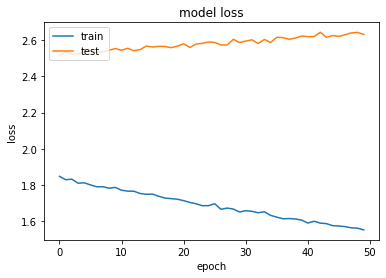

In [92]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model serialisation

In [93]:
# Save model and weights
model_name = 'Emotion_Model.h5'
save_dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Save model and weights at %s ' % model_path)

# Save the model to disk
model_json = model.to_json()
with open("model_json.json", "w") as json_file:
    json_file.write(model_json)

Save model and weights at C:\Users\meher\Desktop\python\emotion detection\saved_models\Emotion_Model.h5 


Model validation

In [94]:
# loading json and model architecture 
json_file = open('model_json.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("saved_models/Emotion_Model.h5")
print("Loaded model from disk")
 
# Keras optimiser
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded model from disk
accuracy: 12.66%


In [95]:
preds = loaded_model.predict(X_test, 
                         batch_size=16, 
                         verbose=1)

preds=preds.argmax(axis=1)
preds

3041/3041 [==============================] - 1s 409us/step


array([ 2,  2,  5, ..., 12,  1,  4], dtype=int64)

In [96]:
# predictions 
preds = preds.astype(int).flatten()
preds = (lb.inverse_transform((preds)))
preds = pd.DataFrame({'predictedvalues': preds})

# Actual labels
actual=y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
actual = pd.DataFrame({'actualvalues': actual})

# Lets combined both of them into a single dataframe
finaldf = actual.join(preds)
finaldf[170:180]

actualvalues predictedvalues
170        male_sad        male_sad
171    female_happy  female_disgust
172      male_angry      male_happy
173    female_happy  female_neutral
174    male_disgust  female_neutral
175     female_fear    female_angry
176      male_happy    male_disgust
177     female_fear       male_fear
178      male_angry       male_fear
179  female_neutral  female_neutral

In [97]:
# Write out the predictions to disk
finaldf.to_csv('Predictions.csv', index=False)
finaldf.groupby('predictedvalues').count()

actualvalues
predictedvalues              
female_angry              344
female_disgust            544
female_fear               427
female_happy              142
female_neutral            224
female_sad                182
female_surprise            72
male_angry                109
male_disgust              148
male_fear                 263
male_happy                226
male_neutral               96
male_sad                  244
male_surprise              20

In [98]:
# the confusion matrix heat map plot
def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
        
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Gender recode function
def gender(row):
    if row == 'female_disgust' or 'female_fear' or 'female_happy' or 'female_sad' or 'female_surprise' or 'female_neutral':
        return 'female'
    elif row == 'male_angry' or 'male_fear' or 'male_happy' or 'male_sad' or 'male_surprise' or 'male_neutral' or 'male_disgust':
        return 'male'

0.12660309108845774


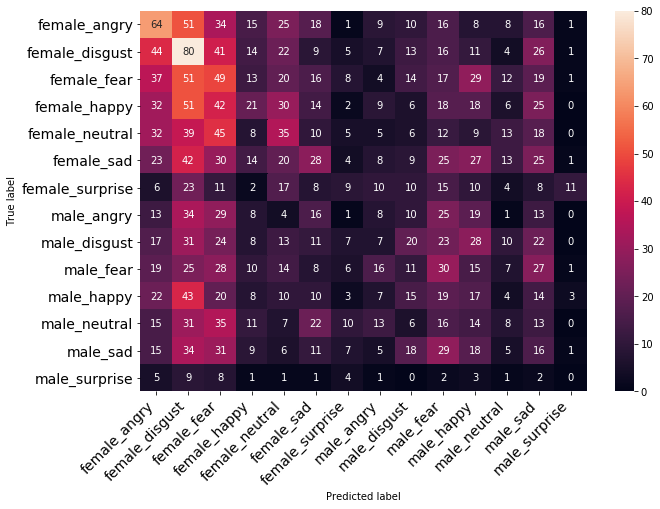

In [99]:
# Get the predictions file 
finaldf = pd.read_csv("Predictions.csv")
classes = finaldf.actualvalues.unique()
classes.sort()    

# Confusion matrix 
c = confusion_matrix(finaldf.actualvalues, finaldf.predictedvalues)
print(accuracy_score(finaldf.actualvalues, finaldf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [100]:
# Classification report 
classes = finaldf.actualvalues.unique()
classes.sort()    
print(classification_report(finaldf.actualvalues, finaldf.predictedvalues, target_names=classes))

                 precision    recall  f1-score   support

   female_angry       0.19      0.23      0.21       276
 female_disgust       0.15      0.27      0.19       293
    female_fear       0.11      0.17      0.14       290
   female_happy       0.15      0.08      0.10       274
 female_neutral       0.16      0.15      0.15       237
     female_sad       0.15      0.10      0.12       269
female_surprise       0.12      0.06      0.08       144
     male_angry       0.07      0.04      0.06       181
   male_disgust       0.14      0.09      0.11       221
      male_fear       0.11      0.14      0.12       217
     male_happy       0.08      0.09      0.08       195
   male_neutral       0.08      0.04      0.05       201
       male_sad       0.07      0.08      0.07       205
  male_surprise       0.00      0.00      0.00        38

       accuracy                           0.13      3041
      macro avg       0.11      0.11      0.11      3041
   weighted avg       0.12   

0.5797435054258467


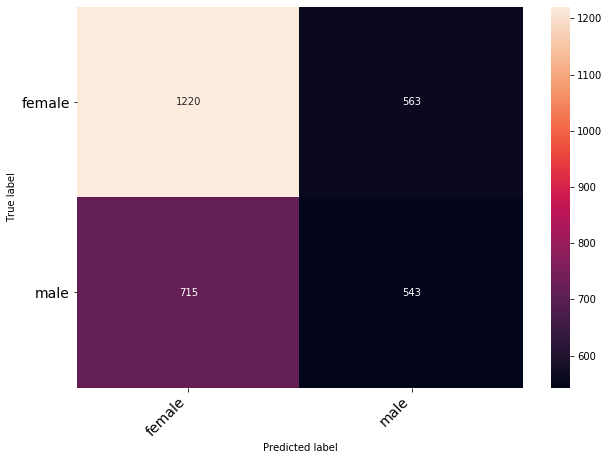

In [101]:
modidf = finaldf
modidf['actualvalues'] = finaldf.actualvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

modidf['predictedvalues'] = finaldf.predictedvalues.replace({'female_angry':'female'
                                       , 'female_disgust':'female'
                                       , 'female_fear':'female'
                                       , 'female_happy':'female'
                                       , 'female_sad':'female'
                                       , 'female_surprise':'female'
                                       , 'female_neutral':'female'
                                       , 'male_angry':'male'
                                       , 'male_fear':'male'
                                       , 'male_happy':'male'
                                       , 'male_sad':'male'
                                       , 'male_surprise':'male'
                                       , 'male_neutral':'male'
                                       , 'male_disgust':'male'
                                      })

classes = modidf.actualvalues.unique()  
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [102]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

      female       0.63      0.68      0.66      1783
        male       0.49      0.43      0.46      1258

    accuracy                           0.58      3041
   macro avg       0.56      0.56      0.56      3041
weighted avg       0.57      0.58      0.57      3041



Emotion accuracy

0.19500164419598817


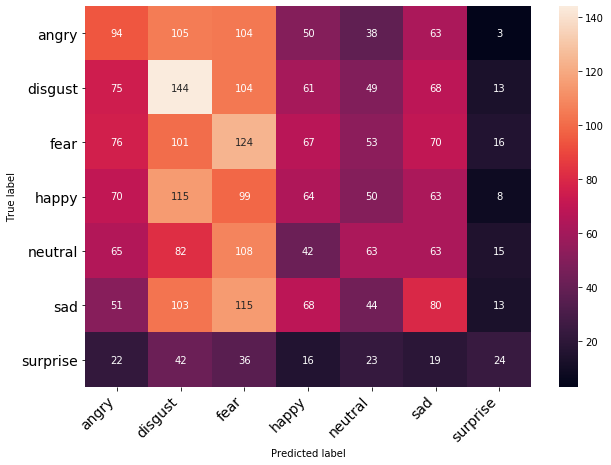

In [103]:
modidf = pd.read_csv("Predictions.csv")
modidf['actualvalues'] = modidf.actualvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

modidf['predictedvalues'] = modidf.predictedvalues.replace({'female_angry':'angry'
                                       , 'female_disgust':'disgust'
                                       , 'female_fear':'fear'
                                       , 'female_happy':'happy'
                                       , 'female_sad':'sad'
                                       , 'female_surprise':'surprise'
                                       , 'female_neutral':'neutral'
                                       , 'male_angry':'angry'
                                       , 'male_fear':'fear'
                                       , 'male_happy':'happy'
                                       , 'male_sad':'sad'
                                       , 'male_surprise':'surprise'
                                       , 'male_neutral':'neutral'
                                       , 'male_disgust':'disgust'
                                      })

classes = modidf.actualvalues.unique() 
classes.sort() 

# Confusion matrix 
c = confusion_matrix(modidf.actualvalues, modidf.predictedvalues)
print(accuracy_score(modidf.actualvalues, modidf.predictedvalues))
print_confusion_matrix(c, class_names = classes)

In [104]:
# Classification report 
classes = modidf.actualvalues.unique()
classes.sort()    
print(classification_report(modidf.actualvalues, modidf.predictedvalues, target_names=classes))

              precision    recall  f1-score   support

       angry       0.21      0.21      0.21       457
     disgust       0.21      0.28      0.24       514
        fear       0.18      0.24      0.21       507
       happy       0.17      0.14      0.15       469
     neutral       0.20      0.14      0.17       438
         sad       0.19      0.17      0.18       474
    surprise       0.26      0.13      0.18       182

    accuracy                           0.20      3041
   macro avg       0.20      0.19      0.19      3041
weighted avg       0.20      0.20      0.19      3041

